In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Benchmark History Table Info

In [3]:
benchhist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BenchmarkHistory.csv')
benchhist.sample(3)

,BenchmarkID,HistoryDate,DailyValue,MonthlyValue,QuarterlyValue,GrowthOfDollar,IsActiveRecord,BatchID,CurrencyID
97740,86,2018-07-03 00:00:00.000,NaN,1260.970000,NaN,NaN,1,NaN,333
250604,166,2005-11-08 00:00:00.000,NaN,1837.800000,NaN,NaN,1,NaN,333
80246,79,2004-07-15 00:00:00.000,NaN,719.132989,NaN,NaN,1,NaN,231


In [4]:
benchhist['HistoryDate'] = pd.to_datetime(benchhist['HistoryDate'], format = '%Y-%m')

In [5]:
benchhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314888 entries, 0 to 314887
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   BenchmarkID     314888 non-null  int64         
 1   HistoryDate     314888 non-null  datetime64[ns]
 2   DailyValue      0 non-null       float64       
 3   MonthlyValue    314888 non-null  float64       
 4   QuarterlyValue  0 non-null       float64       
 5   GrowthOfDollar  0 non-null       float64       
 6   IsActiveRecord  314888 non-null  int64         
 7   BatchID         0 non-null       float64       
 8   CurrencyID      314888 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 21.6 MB


- Check missing values

In [6]:
benchhist.isnull().sum()

BenchmarkID            0
HistoryDate            0
DailyValue        314888
MonthlyValue           0
QuarterlyValue    314888
GrowthOfDollar    314888
IsActiveRecord         0
BatchID           314888
CurrencyID             0
dtype: int64

- df[df.columns[~df.isnull().any()]] will give you a DataFrame with only the columns that have no null values, and should be the solution.


In [7]:
benchhist = benchhist[benchhist.columns[~benchhist.isnull().any()]]

In [10]:
benchhist.isnull().sum()

BenchmarkID       0
HistoryDate       0
MonthlyValue      0
IsActiveRecord    0
CurrencyID        0
dtype: int64

In [11]:
benchhist.shape

(314888, 5)

- Unique BenchmarkID：244
- 314888 rows of data
- 5 columns of data

In [12]:
benchhist.nunique()

BenchmarkID          244
HistoryDate        10687
MonthlyValue      261653
IsActiveRecord         1
CurrencyID             2
dtype: int64

- 2 Currency IDs in the Benchmark History Table

In [13]:
benchhist.CurrencyID.value_counts()

333    311332
231      3556
Name: CurrencyID, dtype: int64

- Drop Duplicate rows

In [14]:
benchhist.drop_duplicates(inplace = True)
benchhist.shape

(314888, 5)

## Benchmark ID list

- 244 unique Benchmark IDs

In [15]:
bench_id = list(benchhist.BenchmarkID.unique())

# Currency Code Table Info

In [16]:
currencycode = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CurrencyCodes.csv')
currencycode.sample(2)

,ID,Symbol,Currency,Description,IsDeleted,ShortCode,BatchID
114,297,,PGK,Kina,NaN,NaN,NaN
70,253,J$,JMD,Jamaican Dollar,NaN,NaN,NaN


- 231: EUR (European Union Euro)
- 333: USD (US Dollar)


In [18]:
currencycode[currencycode.ID.isin([333,231])]

,ID,Symbol,Currency,Description,IsDeleted,ShortCode,BatchID
48,231,€,EUR,European Union Euro,NaN,eu,NaN
150,333,$,USD,US Dollar,NaN,us,NaN


- 243 USD-related Benchmarks

- 1 EUR-related Benchmark: 'Benchmark #79'


In [19]:
print(benchhist[benchhist.CurrencyID == 333].BenchmarkID.nunique())
print(benchhist[benchhist.CurrencyID == 231].BenchmarkID.nunique())

243
1


# Divide into USD-related dataset and EUR-related dataset


In [21]:
benchmark_usd = benchhist[benchhist.CurrencyID == 333]
benchmark_eur = benchhist[benchhist.CurrencyID == 231]

benchmark_usd['HistoryDate'] = benchmark_usd['HistoryDate'].dt.to_period('M')
benchmark_usd['year'] = benchmark_usd['HistoryDate'].dt.year
benchmark_usd['month'] = benchmark_usd['HistoryDate'].dt.month
benchmark_usd.drop_duplicates(inplace = True)


benchmark_eur['HistoryDate'] = benchmark_eur['HistoryDate'].dt.to_period('M')
benchmark_eur['year'] = benchmark_eur['HistoryDate'].dt.year
benchmark_eur['month'] = benchmark_eur['HistoryDate'].dt.month
benchmark_eur.drop_duplicates(inplace = True)


benchmark_usd.reset_index(drop=True, inplace = True)
benchmark_eur.reset_index(drop = True, inplace = True)

In [22]:
benchmark_usd['HistoryDate'] = benchmark_usd.HistoryDate.values.astype('datetime64[M]')
benchmark_eur['HistoryDate'] = benchmark_eur.HistoryDate.values.astype('datetime64[M]')

In [23]:
benchmark_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297028 entries, 0 to 297027
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   BenchmarkID     297028 non-null  int64         
 1   HistoryDate     297028 non-null  datetime64[ns]
 2   MonthlyValue    297028 non-null  float64       
 3   IsActiveRecord  297028 non-null  int64         
 4   CurrencyID      297028 non-null  int64         
 5   year            297028 non-null  int64         
 6   month           297028 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 15.9 MB


In [24]:
benchmark_usd[benchmark_usd.duplicated(keep = False)]

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month


In [25]:
benchmark_usd

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month
0,30,1995-12-01,100.00000,1,333,1995,12
1,30,1996-01-01,102.11000,1,333,1996,1
2,30,1996-02-01,104.50959,1,333,1996,2
3,30,1996-03-01,106.02497,1,333,1996,3
4,30,1996-04-01,109.02548,1,333,1996,4
...,...,...,...,...,...,...,...
297023,345,2021-06-01,4366.87842,1,333,2021,6
297024,345,2021-07-01,4421.28972,1,333,2021,7
297025,345,2021-08-01,4456.66004,1,333,2021,8
297026,345,2021-09-01,4377.95542,1,333,2021,9


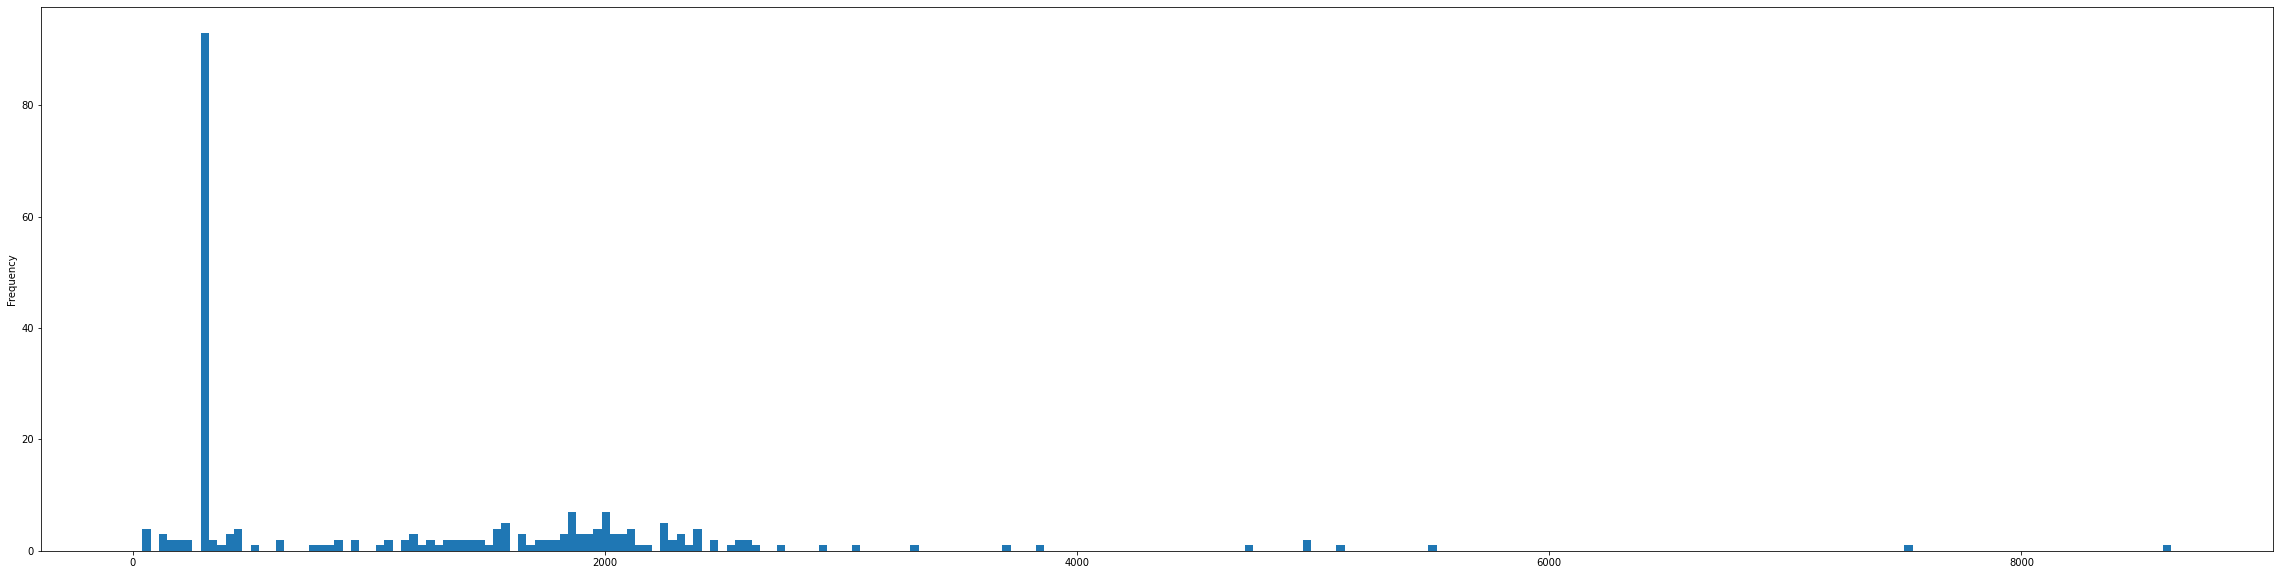

In [34]:
plt.figure(figsize = (40,10))
benchmark_usd.groupby('BenchmarkID').size().plot(kind = 'hist', bins = 243)

- Benchmark ID: 166 is has the earliest start date

In [36]:
benchmark_usd.groupby('BenchmarkID').size().sort_values(ascending = False)

BenchmarkID
166    8635
105    7532
108    5501
104    5123
69     4959
       ... 
90      128
72       64
157      60
151      41
152      41
Length: 243, dtype: int64

In [38]:
benchmark_usd[benchmark_usd.BenchmarkID == 166]

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month
232344,166,1979-09-01,76.030490,1,333,1979,9
232345,166,1979-10-01,76.030490,1,333,1979,10
232346,166,1979-12-01,76.106530,1,333,1979,12
232347,166,1980-03-01,72.986160,1,333,1980,3
232348,166,1980-06-01,82.693320,1,333,1980,6
...,...,...,...,...,...,...,...
240974,166,2021-10-01,9511.267375,1,333,2021,10
240975,166,2021-10-01,9605.227650,1,333,2021,10
240976,166,2021-10-01,9625.021864,1,333,2021,10
240977,166,2021-11-01,9642.444917,1,333,2021,11


# Three Year Functions

## All time Trending Plots

In [39]:
# benchid e.g. 30, 55, ...
# return a benchmark history dataset in a specific benchmark ID
def all_trending_plot(benchid, plot = False):
    benchdf = benchmark_usd[benchmark_usd.BenchmarkID == benchid]
    date_min = str(benchdf.HistoryDate.min())[:10]
    date_max = str(benchdf.HistoryDate.max())[:10]
    if plot == True:
        print('Benchmark ID is {}'.format(benchid))
        print('start date is {} \nend date is {} \nlength period is {} years'.format(benchdf.HistoryDate.min(),benchdf.HistoryDate.max(),benchdf.year.max() - benchdf.year.min()))
        plt.figure(figsize=(18,3))
        sns.lineplot(x = benchdf.HistoryDate, y = benchdf.MonthlyValue)
        plt.title('The Monthly Values Trend of Benchmark "{}" from '.format(benchid)+ date_min +' to '+ date_max)
        plt.show()
    return benchdf

Benchmark ID is 30
start date is 1995-12-01 00:00:00 
end date is 2021-10-01 00:00:00 
length period is 26 years


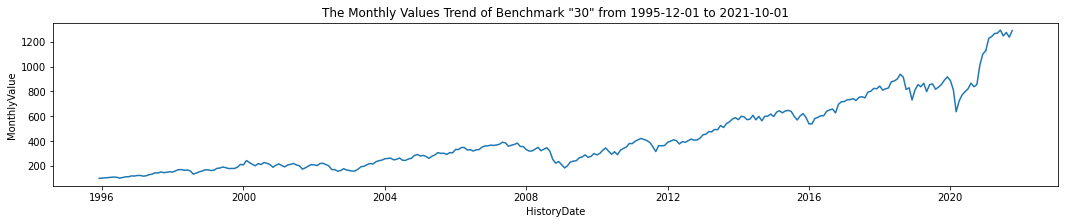

In [40]:
bench_30_all = all_trending_plot(30, True)

## Three Year Trending Plots 

In [42]:
# "benchdf" from all_trending_plot() 
# "benchid" e.g. 30, 55, ...
def three_year(benchdf,benchid):
    benchdf_three = {}
    for i in range(math.ceil(len(benchdf)/36)):  # change the time period 36 = 12 X 3 = 3 years
        start = str(benchdf.HistoryDate.iloc[i*36])[:7]
        benchdf_three[start] = benchdf.iloc[i*36:(i+1)*36, :]
    return benchdf_three


# "benchdf" from all_trending_plot() 
# "benchid" e.g. 30, 55, ...
def three_year_plot(benchdf, benchdf_anomaly, benchid):
    print('Benchmark ID is {}'.format(benchid))
    print('start date is {} \nend date is {} \nlength period is {} years'.format(benchdf.HistoryDate.min(),benchdf.HistoryDate.max(),len(benchdf.month)/12))
    plt.figure(figsize=(18,10))
    sns.lineplot(x = benchdf.HistoryDate, y = benchdf.MonthlyValue)
    plt.plot(benchdf_anomaly.HistoryDate, benchdf_anomaly.MonthlyValue, linestyle='none', marker='X', color='red', markersize=7)
    date_min = str(benchdf.HistoryDate.min())[:10]
    date_max = str(benchdf.HistoryDate.max())[:10]
    plt.title('The Monthly Values Trend of Benchmark "{}" from '.format(benchid)+ date_min +' to '+ date_max)
    plt.xticks(rotation = 45)
    sns.set(font_scale=2.5)

## Simple Statistics Method (Moving Average)
- Find out what is normal and if something deviates too much from it — this is an anomaly.
- Simple Moving Average (Three Year Trend and Five Year Trend)

In [43]:
# Return All data without Anomaly detection and All data with Anomaly detection within specific timeframe per benchmark(e.g. 3 year, benchmark 30)
def rolling_mean(benchdf, benchid, window = 12,  plot = False):
    benchdf['SMA'] = benchdf.MonthlyValue.rolling(window = window).mean()
    benchdf['SMA'].bfill(axis = 'rows', inplace = True)
    benchdf['diff'] = (benchdf.MonthlyValue - benchdf['SMA'])
    benchdf['upper'] = benchdf['SMA'] + 2 *(benchdf.MonthlyValue - benchdf['SMA']).std()
    benchdf['lower'] = benchdf['SMA'] - 2 *(benchdf.MonthlyValue - benchdf['SMA']).std()

    benchdf['anomaly detection'] =  0
    conditions = (benchdf.MonthlyValue > benchdf.upper) | (benchdf.MonthlyValue < benchdf.lower)
    benchdf.loc[conditions, 'anomaly detection'] = 1

    if plot == True:
        benchdf[['MonthlyValue', 'SMA']].plot(figsize=(18,3))

    # Ploting the Anomaly when the window is 6
    if window == 6:
        pass    

    if window == 12:
        pass

    if window == 60:
        pass

    anomaly_df = benchdf[benchdf['anomaly detection'] == 1]
    anomaly_1_0_df = benchdf

    return (anomaly_df, anomaly_1_0_df)

In [44]:
# Return All time data with anomaly and without anomaly
def anonmaly_table_benchmark(benchdf, benchid, window = 12):       
       
       all_time_benchmark_anomaly = pd.DataFrame(columns = ['BenchmarkID', 'HistoryDate', 'MonthlyValue', 'IsActiveRecord',
              'CurrencyID', 'year', 'month', 'SMA', 'diff', 'upper', 'lower',
              'anomaly detection'])
       
       all_time_benchmark = pd.DataFrame(columns = ['BenchmarkID', 'HistoryDate', 'MonthlyValue', 'IsActiveRecord',
              'CurrencyID', 'year', 'month', 'SMA', 'diff', 'upper', 'lower',
              'anomaly detection'])

       for i in benchdf.keys():
              cc = rolling_mean(benchdf[i], benchid, window, plot = False)[0]
              dd = rolling_mean(benchdf[i], benchid, window, plot = False)[1]
              all_time_benchmark_anomaly = pd.concat([all_time_benchmark_anomaly,cc], axis =0)
              all_time_benchmark = pd.concat([all_time_benchmark,dd], axis =0)

       return all_time_benchmark_anomaly, all_time_benchmark 
    

In [45]:
# Generate the all time anomaly table for all benchmark
def anonmaly_table_all(window = 12):       
       
       a = pd.DataFrame(columns = ['BenchmarkID', 'HistoryDate', 'MonthlyValue', 'IsActiveRecord',
              'CurrencyID', 'year', 'month', 'SMA', 'diff', 'upper', 'lower',
              'anomaly detection'])
       
       for i in bench_id:
              b = all_trending_plot(i)
              c = three_year(b, i)
              d = anonmaly_table_benchmark(c, i, window = 12)[0]
              a = pd.concat([a,d], axis =0)
              
       return a
       

In [46]:
three_year_30 = three_year(all_trending_plot(30), 30)

In [47]:
three_year_30.keys()

dict_keys(['1995-12', '1998-12', '2001-12', '2004-12', '2007-12', '2010-12', '2013-12', '2016-12', '2019-12'])

In [48]:
three_year_30['1995-12'].MonthlyValue

0     100.00000
1     102.11000
2     104.50959
3     106.02497
4     109.02548
5     110.67177
6     109.01169
7     102.26387
8     107.13163
9     112.42393
10    113.32332
11    120.22471
12    118.99842
13    123.44896
14    123.26378
15    118.02507
16    120.96390
17    129.79426
18    134.03854
19    145.21735
20    143.63448
21    151.83601
22    145.92959
23    149.40271
24    153.52623
25    150.63993
26    162.41998
27    170.11868
28    170.54398
29    165.27417
30    167.57148
31    159.57832
32    134.04579
33    142.71855
34    152.45196
35    159.66294
Name: MonthlyValue, dtype: float64

Benchmark ID is 30
start date is 1995-12-01 00:00:00 
end date is 1998-11-01 00:00:00 
length period is 3.0 years


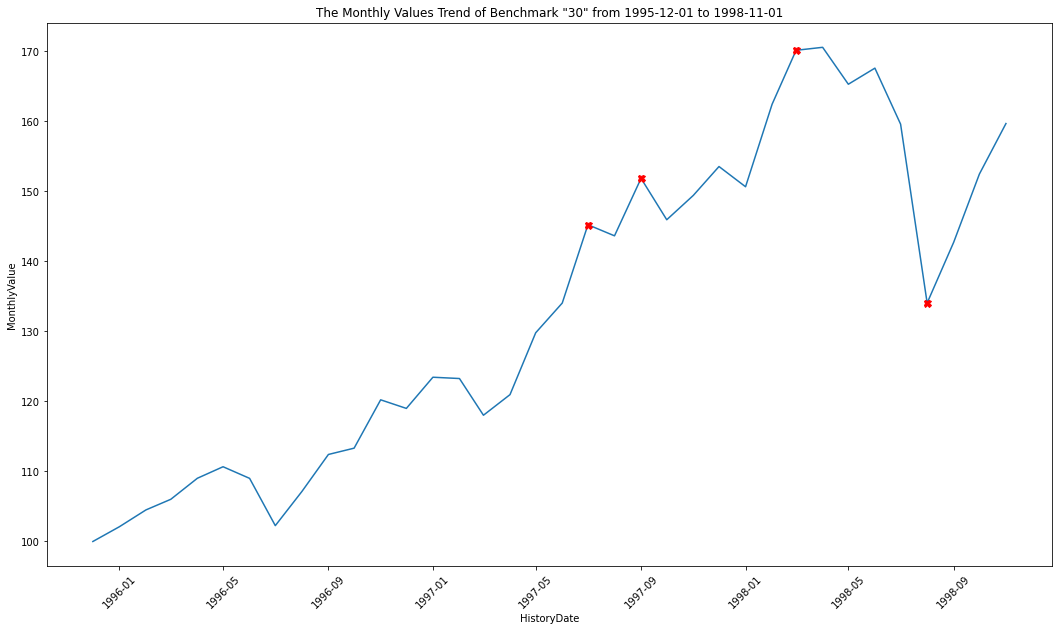

In [49]:
three_year_plot(three_year_30['1995-12'], rolling_mean(three_year_30['1995-12'], 30, window = 12,  plot = False)[0], 30)

In [50]:
all_time_benchmark_30_anomaly_3_year, all_time_benchmark_30_3_year = anonmaly_table_benchmark(three_year_30, 30, window = 12)

In [51]:
all_time_benchmark_30_anomaly_3_year

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month,SMA,diff,upper,lower,anomaly detection
19,30,1997-07-01,145.21735,1,333,1997,7,122.237823,22.979528,143.965496,100.510149,1
21,30,1997-09-01,151.83601,1,333,1997,9,128.564067,23.271943,150.291740,106.836393,1
27,30,1998-03-01,170.11868,1,333,1998,3,146.460138,23.658542,168.187812,124.732465,1
32,30,1998-08-01,134.04579,1,333,1998,8,156.740573,-22.694783,178.468246,135.012899,1
50,30,2000-02-01,243.48236,1,333,2000,2,191.765650,51.716710,224.246519,159.284781,1
121,30,2006-01-01,333.21339,1,333,2006,1,294.977602,38.235788,328.199821,261.755382,1
122,30,2006-02-01,332.28040,1,333,2006,2,298.918935,33.361465,332.141155,265.696715,1
123,30,2006-03-01,348.39599,1,333,2006,3,304.882447,43.513543,338.104667,271.660228,1
124,30,2006-04-01,348.32631,1,333,2006,4,312.162035,36.164275,345.384255,278.939815,1
137,30,2007-05-01,390.96840,1,333,2007,5,354.608528,36.359872,387.830748,321.386309,1


In [52]:
all_time_benchmark_30_3_year

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month,SMA,diff,upper,lower,anomaly detection
0,30,1995-12-01,100.00000,1,333,1995,12,108.060080,-8.060080,129.787754,86.332406,0
1,30,1996-01-01,102.11000,1,333,1996,1,108.060080,-5.950080,129.787754,86.332406,0
2,30,1996-02-01,104.50959,1,333,1996,2,108.060080,-3.550490,129.787754,86.332406,0
3,30,1996-03-01,106.02497,1,333,1996,3,108.060080,-2.035110,129.787754,86.332406,0
4,30,1996-04-01,109.02548,1,333,1996,4,108.060080,0.965400,129.787754,86.332406,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307,30,2021-06-01,1293.15091,1,333,2021,6,1101.898509,191.252401,1364.497862,839.299156,0
308,30,2021-07-01,1246.46816,1,333,2021,7,1133.563214,112.904946,1396.162567,870.963861,0
309,30,2021-08-01,1274.38905,1,333,2021,8,1169.966395,104.422655,1432.565748,907.367042,0
310,30,2021-09-01,1236.79457,1,333,2021,9,1201.777968,35.016602,1464.377321,939.178615,0


Benchmark ID is 30
start date is 1995-12-01 00:00:00 
end date is 2021-10-01 00:00:00 
length period is 26.0 years


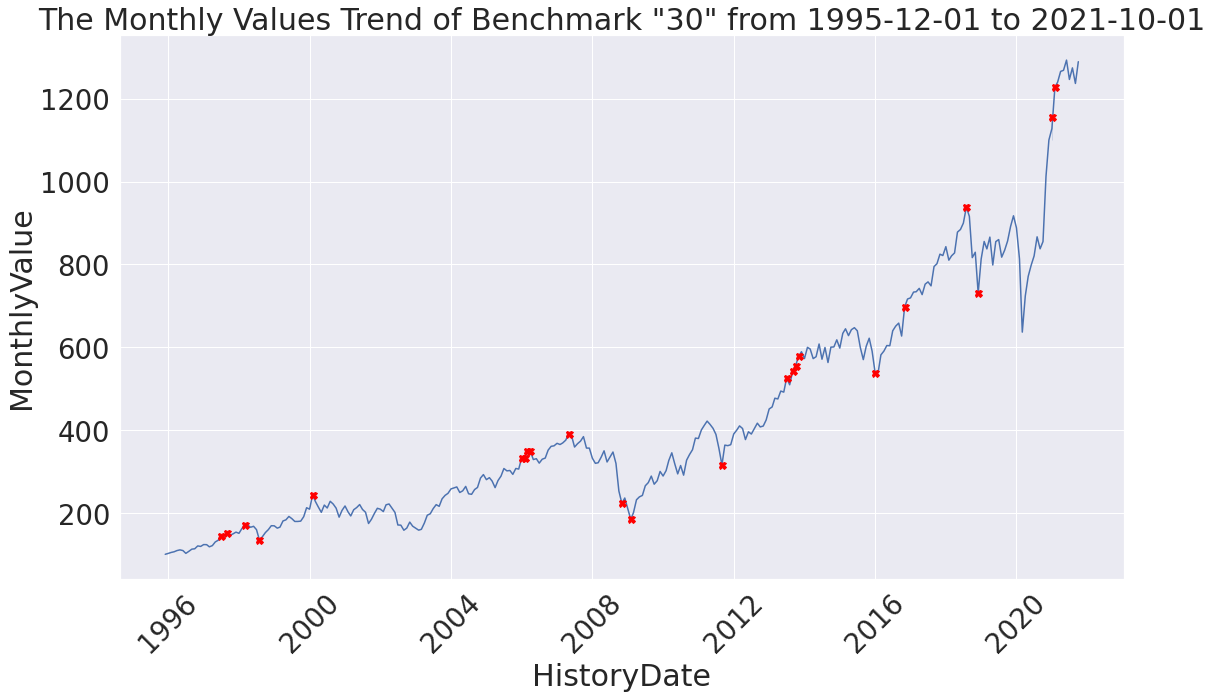

In [53]:
three_year_plot(all_time_benchmark_30_3_year, all_time_benchmark_30_anomaly_3_year, 30)

In [54]:
all_anonmaly_3 = anonmaly_table_all(12)

In [56]:
all_anonmaly_3

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month,SMA,diff,upper,lower,anomaly detection
19,30,1997-07-01,145.21735,1,333,1997,7,122.237823,22.979528,143.965496,100.510149,1
21,30,1997-09-01,151.83601,1,333,1997,9,128.564067,23.271943,150.291740,106.836393,1
27,30,1998-03-01,170.11868,1,333,1998,3,146.460138,23.658542,168.187812,124.732465,1
32,30,1998-08-01,134.04579,1,333,1998,8,156.740573,-22.694783,178.468246,135.012899,1
50,30,2000-02-01,243.48236,1,333,2000,2,191.765650,51.716710,224.246519,159.284781,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296996,345,2019-03-01,3479.08351,1,333,2019,3,3345.868538,133.214972,3473.753270,3217.983805,1
296997,345,2019-04-01,3532.06996,1,333,2019,4,3368.717534,163.352426,3496.602267,3240.832801,1
297013,345,2020-08-01,4058.40302,1,333,2020,8,3782.461334,275.941686,4036.154515,3528.768154,1
297016,345,2020-11-01,4136.58730,1,333,2020,11,3867.011987,269.575313,4120.705167,3613.318806,1


# Five Year Functions

In [57]:
# Draw the trend plot for a specific benchmark across all time
def all_trending_plot(benchid, plot = False):
    benchdf = benchmark_usd[benchmark_usd.BenchmarkID == benchid]
    date_min = str(benchdf.HistoryDate.min())[:10]
    date_max = str(benchdf.HistoryDate.max())[:10]
    if plot == True:
        print('Benchmark ID is {}'.format(benchid))
        print('start date is {} \nend date is {} \nlength period is {} years'.format(benchdf.HistoryDate.min(),benchdf.HistoryDate.max(),benchdf.year.max() - benchdf.year.min()))
        plt.figure(figsize=(18,3))
        sns.lineplot(x = benchdf.HistoryDate, y = benchdf.MonthlyValue)
        plt.title('The Monthly Values Trend of Benchmark "{}" from '.format(benchid)+ date_min +' to '+ date_max)
        plt.show()
    return benchdf

# Return a dict of 5-year trend for a specific benchmark (use the return from the all_trending_plot function)
def five_year(benchdf,benchid):
    benchdf_five = {}
    for i in range(math.ceil(len(benchdf)/60)):  # change the time period 60 = 12 X 5 = 5 years
        start = str(benchdf.HistoryDate.iloc[i*60])[:7]
        benchdf_five[start] = benchdf.iloc[i*60:(i+1)*60, :]
    return benchdf_five


# Return All data without Anomaly detection and All data with Anomaly detection within specific timeframe per benchmark(e.g. 3 year, benchmark 30)
# Defined used inside anonmaly_table_benchmark()
def rolling_mean(benchdf, benchid, window = 12,  plot = False):
    benchdf['SMA'] = benchdf.MonthlyValue.rolling(window = window).mean()
    benchdf['SMA'].bfill(axis = 'rows', inplace = True)
    benchdf['diff'] = (benchdf.MonthlyValue - benchdf['SMA'])
    benchdf['upper'] = benchdf['SMA'] + 2 *(benchdf.MonthlyValue - benchdf['SMA']).std()
    benchdf['lower'] = benchdf['SMA'] - 2 *(benchdf.MonthlyValue - benchdf['SMA']).std()

    benchdf['anomaly detection'] =  0
    conditions = (benchdf.MonthlyValue > benchdf.upper) | (benchdf.MonthlyValue < benchdf.lower)
    benchdf.loc[conditions, 'anomaly detection'] = 1

    if plot == True:
        benchdf[['MonthlyValue', 'SMA']].plot(figsize=(18,3))

    # Ploting the Anomaly when the window is 6
    if window == 6:
        pass    

    if window == 12:
        pass

    if window == 60:
        pass

    anomaly_df = benchdf[benchdf['anomaly detection'] == 1]
    anomaly_1_0_df = benchdf

    return (anomaly_df, anomaly_1_0_df)


# Return All time data with anomaly and without anomaly for a specific benchmark (use the return from five_year function)
def anonmaly_table_benchmark(benchdf, benchid, window = 12, plot = False):       
       
       all_time_benchmark_anomaly = pd.DataFrame(columns = ['BenchmarkID', 'HistoryDate', 'MonthlyValue', 'IsActiveRecord',
              'CurrencyID', 'year', 'month', 'SMA', 'diff', 'upper', 'lower',
              'anomaly detection'])
       
       all_time_benchmark = pd.DataFrame(columns = ['BenchmarkID', 'HistoryDate', 'MonthlyValue', 'IsActiveRecord',
              'CurrencyID', 'year', 'month', 'SMA', 'diff', 'upper', 'lower',
              'anomaly detection'])

       for i in benchdf.keys():
              cc = rolling_mean(benchdf[i], benchid, window, plot = False)[0]
              dd = rolling_mean(benchdf[i], benchid, window, plot = False)[1]
              all_time_benchmark_anomaly = pd.concat([all_time_benchmark_anomaly,cc], axis =0)
              all_time_benchmark = pd.concat([all_time_benchmark,dd], axis =0)

       return all_time_benchmark_anomaly, all_time_benchmark 


# Draw a anomaly plot for a specific benchmark (use the return from anonmaly_table_benchmark function)
def anomaly_plot(benchdf, benchdf_anomaly, benchid):
    print('Benchmark ID is {}'.format(benchid))
    print('start date is {} \nend date is {} \nlength period is {} years'.format(benchdf.HistoryDate.min(),benchdf.HistoryDate.max(),len(benchdf.month)/12))
    plt.figure(figsize=(18,10))
    sns.lineplot(x = benchdf.HistoryDate, y = benchdf.MonthlyValue)
    plt.plot(benchdf_anomaly.HistoryDate, benchdf_anomaly.MonthlyValue, linestyle='none', marker='X', color='red', markersize=7)
    date_min = str(benchdf.HistoryDate.min())[:10]
    date_max = str(benchdf.HistoryDate.max())[:10]
    plt.title('The Monthly Values Trend of Benchmark "{}" from '.format(benchid)+ date_min +' to '+ date_max)
    plt.xticks(rotation = 45)
    sns.set(font_scale=2)


# Generate the all time anomaly table for all benchmark
def anonmaly_table_all(window = 12):       
       
       a = pd.DataFrame(columns = ['BenchmarkID', 'HistoryDate', 'MonthlyValue', 'IsActiveRecord',
              'CurrencyID', 'year', 'month', 'SMA', 'diff', 'upper', 'lower',
              'anomaly detection'])
       
       for i in bench_id:
              b = all_trending_plot(i)
              c = five_year(b, i)
              d = anonmaly_table_benchmark(c, i, window = 12)[0]
              a = pd.concat([a,d], axis =0)
              
       return a



In [58]:
five_year_30 = five_year(all_trending_plot(30), 30)

In [59]:
five_year_30.keys()

dict_keys(['1995-12', '2000-12', '2005-12', '2010-12', '2015-12', '2020-12'])

In [60]:
five_year_30['1995-12'].MonthlyValue

0     100.00000
1     102.11000
2     104.50959
3     106.02497
4     109.02548
5     110.67177
6     109.01169
7     102.26387
8     107.13163
9     112.42393
10    113.32332
11    120.22471
12    118.99842
13    123.44896
14    123.26378
15    118.02507
16    120.96390
17    129.79426
18    134.03854
19    145.21735
20    143.63448
21    151.83601
22    145.92959
23    149.40271
24    153.52623
25    150.63993
26    162.41998
27    170.11868
28    170.54398
29    165.27417
30    167.57148
31    159.57832
32    134.04579
33    142.71855
34    152.45196
35    159.66294
36    169.01918
37    168.73185
38    163.11308
39    165.65765
40    180.50057
41    183.13588
42    191.41362
43    186.16889
44    179.28064
45    179.31649
46    180.05169
47    190.80078
48    212.39943
49    208.97980
50    243.48236
51    227.43687
52    213.74517
53    201.28383
54    218.83578
55    211.78927
56    227.94879
57    221.24709
58    211.37947
59    189.67080
Name: MonthlyValue, dtype: float64

Benchmark ID is 30
start date is 2005-12-01 00:00:00 
end date is 2010-11-01 00:00:00 
length period is 5.0 years


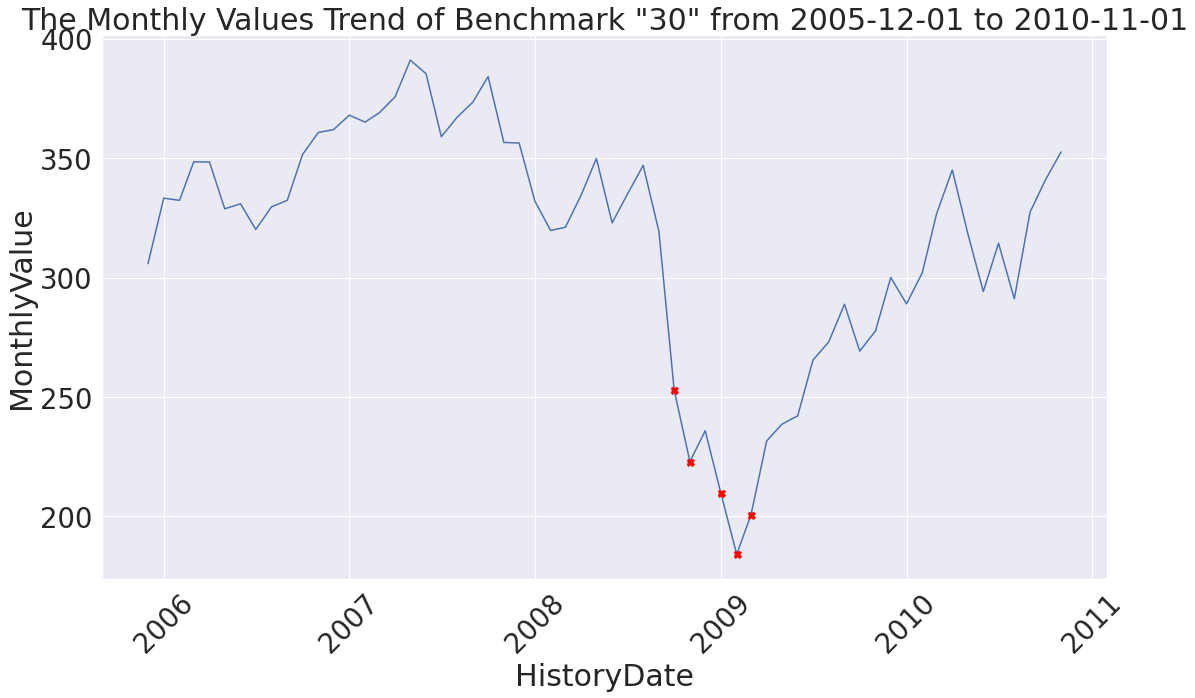

In [61]:
anomaly_plot(five_year_30['2005-12'], rolling_mean(five_year_30['2005-12'], 30, window = 12,  plot = False)[0], 30)

In [62]:
all_time_benchmark_30_anomaly_5_year, all_time_benchmark_30_5_year = anonmaly_table_benchmark(five_year_30, 30, window = 12)

In [63]:
all_time_benchmark_30_anomaly_5_year

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month,SMA,diff,upper,lower,anomaly detection
42,30,1999-06-01,191.41362,1,333,1999,6,164.169116,27.244504,189.843441,138.494790,1
48,30,1999-12-01,212.39943,1,333,1999,12,181.714214,30.685216,207.388540,156.039889,1
50,30,2000-02-01,243.48236,1,333,2000,2,191.765650,51.716710,217.439976,166.091324,1
51,30,2000-03-01,227.43687,1,333,2000,3,196.913918,30.522952,222.588244,171.239593,1
59,30,2000-11-01,189.67080,1,333,2000,11,215.683222,-26.012422,241.357547,190.008896,1
94,30,2003-10-01,233.93612,1,333,2003,10,189.580395,44.355725,232.367327,146.793463,1
95,30,2003-11-01,242.24085,1,333,2003,11,194.954629,47.286221,237.741561,152.167698,1
96,30,2003-12-01,247.15834,1,333,2003,12,201.563711,45.594629,244.350642,158.776779,1
97,30,2004-01-01,257.88502,1,333,2004,1,209.454135,48.430885,252.241067,166.667203,1
154,30,2008-10-01,252.86283,1,333,2008,10,328.880089,-76.017259,403.059369,254.700809,1


In [64]:
all_time_benchmark_30_5_year

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month,SMA,diff,upper,lower,anomaly detection
0,30,1995-12-01,100.00000,1,333,1995,12,108.060080,-8.060080,133.734406,82.385754,0
1,30,1996-01-01,102.11000,1,333,1996,1,108.060080,-5.950080,133.734406,82.385754,0
2,30,1996-02-01,104.50959,1,333,1996,2,108.060080,-3.550490,133.734406,82.385754,0
3,30,1996-03-01,106.02497,1,333,1996,3,108.060080,-2.035110,133.734406,82.385754,0
4,30,1996-04-01,109.02548,1,333,1996,4,108.060080,0.965400,133.734406,82.385754,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307,30,2021-06-01,1293.15091,1,333,2021,6,1224.837626,68.313284,1361.779933,1087.895319,0
308,30,2021-07-01,1246.46816,1,333,2021,7,1224.837626,21.630534,1361.779933,1087.895319,0
309,30,2021-08-01,1274.38905,1,333,2021,8,1224.837626,49.551424,1361.779933,1087.895319,0
310,30,2021-09-01,1236.79457,1,333,2021,9,1224.837626,11.956944,1361.779933,1087.895319,0


Benchmark ID is 30
start date is 1995-12-01 00:00:00 
end date is 2021-10-01 00:00:00 
length period is 26.0 years


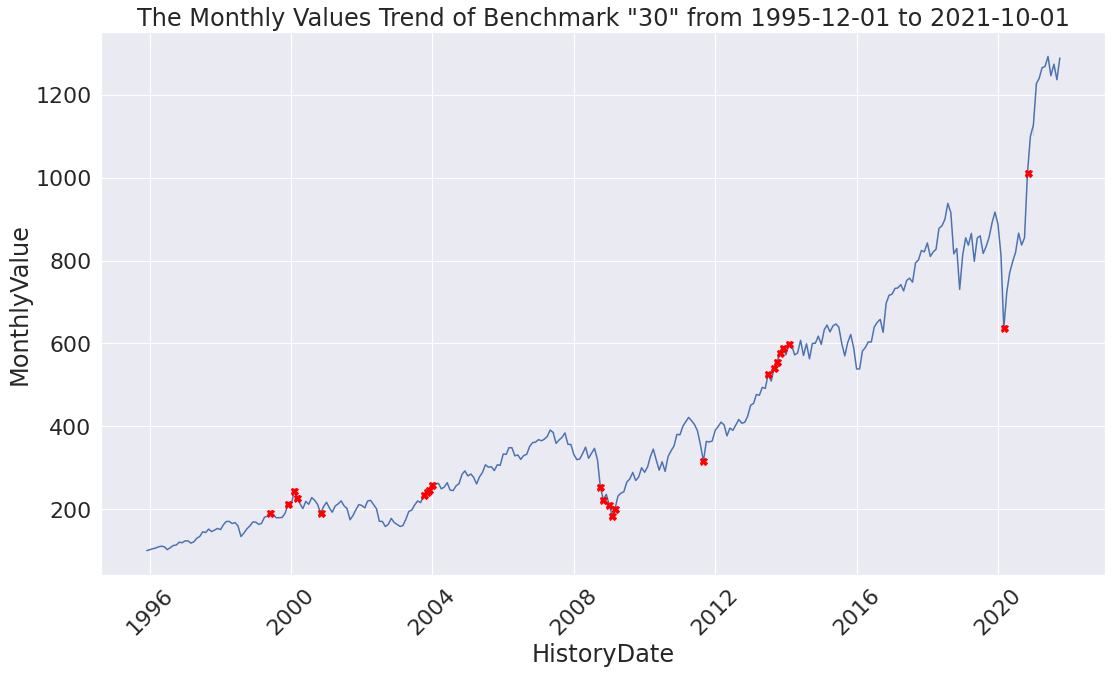

In [65]:
anomaly_plot(all_time_benchmark_30_5_year, all_time_benchmark_30_anomaly_5_year, 30)

In [66]:
all_anonmaly_5 = anonmaly_table_all(12)

In [67]:
all_anonmaly_5 

,BenchmarkID,HistoryDate,MonthlyValue,IsActiveRecord,CurrencyID,year,month,SMA,diff,upper,lower,anomaly detection
42,30,1999-06-01,191.41362,1,333,1999,6,164.169116,27.244504,189.843441,138.494790,1
48,30,1999-12-01,212.39943,1,333,1999,12,181.714214,30.685216,207.388540,156.039889,1
50,30,2000-02-01,243.48236,1,333,2000,2,191.765650,51.716710,217.439976,166.091324,1
51,30,2000-03-01,227.43687,1,333,2000,3,196.913918,30.522952,222.588244,171.239593,1
59,30,2000-11-01,189.67080,1,333,2000,11,215.683222,-26.012422,241.357547,190.008896,1
...,...,...,...,...,...,...,...,...,...,...,...,...
297003,345,2019-10-01,3701.58068,1,333,2019,10,3511.340922,190.239758,3662.411373,3360.270471,1
297004,345,2019-11-01,3742.15001,1,333,2019,11,3545.646599,196.503411,3696.717050,3394.576148,1
297005,345,2019-12-01,3786.26995,1,333,2019,12,3589.010443,197.259507,3740.080893,3437.939992,1
297006,345,2020-01-01,3823.98120,1,333,2020,1,3625.928741,198.052459,3776.999192,3474.858290,1


In [68]:
# Plot outliers detected by both 3-year MA and 5-year MA 
# for a specific Benchmark ID
# Compare the differences between 2 methods

def anomaly_plot_comb(benchdf, benchdf_anomaly_3,benchdf_anomaly_5, benchid):
    date_min = str(benchdf.HistoryDate.min())[:10]
    date_max = str(benchdf.HistoryDate.max())[:10]
    plt.figure(figsize=(35,7))
    sns.lineplot(x = benchdf.HistoryDate, y = benchdf.MonthlyValue)
    plt.plot(benchdf_anomaly_3.HistoryDate, benchdf_anomaly_3.MonthlyValue, linestyle='none', marker='X', color='red', markersize=8, label = '3 yr')
    plt.plot(benchdf_anomaly_5.HistoryDate, benchdf_anomaly_5.MonthlyValue, linestyle='none', marker='s', color='green', markersize=5, label = '5 yr')
    plt.title('The Monthly Values Trend of Benchmark "{}" from '.format(benchid)+ date_min +' to '+ date_max, fontsize = 30)
    plt.xticks(rotation = 45)
    plt.legend(prop={'size': 13})
    plt.xlabel('Date', fontsize=30)
    plt.ylabel('Monthly Value',fontsize=30)
    plt.savefig("benchmark.png")

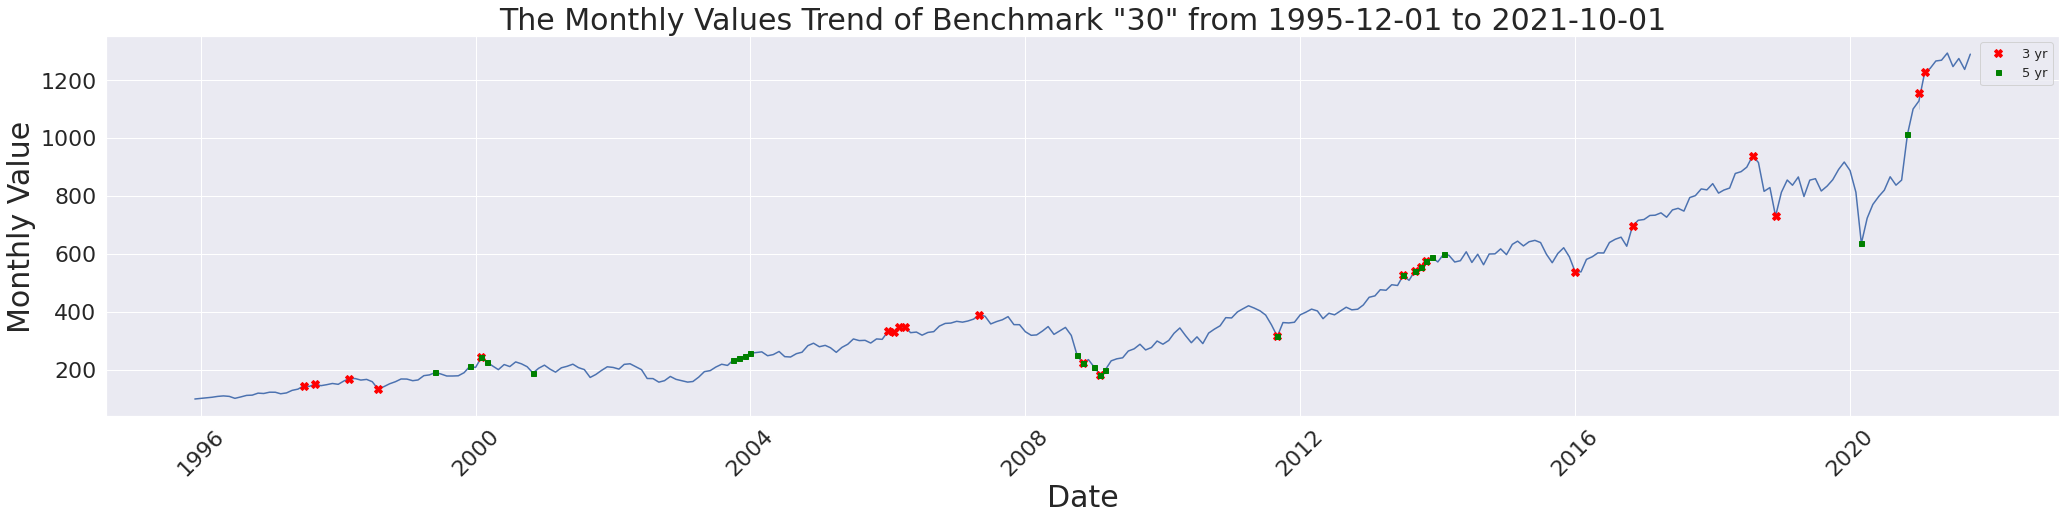

In [69]:
anomaly_plot_comb(all_time_benchmark_30_5_year,all_time_benchmark_30_anomaly_3_year, all_time_benchmark_30_anomaly_5_year,30)